# 1) Defina o que é uma Rede Neural Artificial.
### Conjunto de neurônios artificais onde cada neurônio tem como objetivo responder positivamente ou negativamente a uma entrada (estimulo), simulando o funcionamento de neurônios cerebrais.

# 2) Quais elementos (dos até então vistos) compõem uma Rede Neural Artifical? Ilustre e exemplifique.
### Perceptron e Adaline. Ambos tem como objetivo simular um neurônio específico, respondendo a estimulos. A diferença entre eles está no uso da função de ativação. Enquanto o perceptron aplica a função de ativação durante o aprendizado para averiguar se houve acerto, o Adaline aplica apenas no final do aprendizado.

![](./assets/perceptron_adaline.png)

Imagem retirada de [Sebastian Raschka](https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html)

# 3) O Perceptron é um classificador linear. Justifique.
### É considerado classificador linear pois a função que dita a regra de aprendizado é uma função linear: g(x) = W_0 + x . W^T, onde W representa o vetor de pesos e W_0 representa o bies.

![](./assets/graphic.png)

Imagem retirada de [David Menotti](https://www.inf.ufpr.br/menotti/ci171-182/slides/ci171-classlinear.pdf)

# 4) Qual a diferença entre o Perceptron e o Adaline?
### Respondido na questão 2.

# PARTE A. Perceptron - Conjunto de dados Iris

In [1]:
import pandas as pd

Xy = pd.read_csv('./datasets/iris_adapted.csv')

X = Xy.drop(['sepal-width', 'petal-width', 'class'], axis = 1)
y = Xy['class']

X.head()

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


# Separando dados de treino e teste

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizando os dados de treino

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

# Treinando o Perceptron com os dados de treino normalizados

In [13]:
from perceptron.perceptron import Perceptron

cls_perceptron = Perceptron()
cls_perceptron.fit(X_train_scaler, y_train)
cls_perceptron.score(X_test, y_test)

0.7

# Matriz de confusão

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_perceptron.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
vn = verdadeiros negativos, fp = falsos positivos, 
fn = falsos negativos, vp = verdadeiros positivos

[[vn, fp],
 [fn, vp]]
'''
conf_matrix

array([[21,  0],
       [ 9,  0]])

# Superfície de decisão das amostras

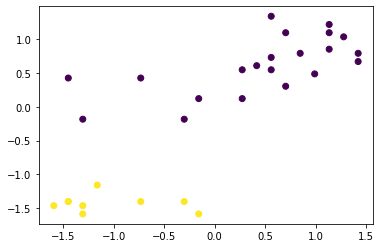

In [46]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

X_test_scaler = StandardScaler().fit_transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns) # convertendo para DF

plt.scatter(X_test_scaler['sepal-length'], X_test_scaler['petal-length'], c = y_test)
plt.show()

# Reta produzida pelo vetor de pesos

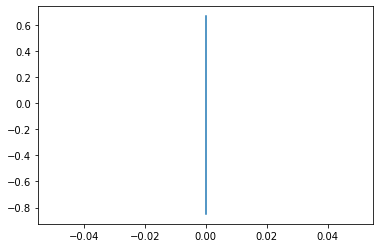

In [47]:
from matplotlib import pyplot as plt

plt.plot([0 for _ in cls_perceptron.get_weight()], cls_perceptron.get_weight())
plt.show()